C:\Users\AudreyHay\AppData\Local\Temp\ipykernel_19684\2312966043.py:57: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  EMGcwt = signal.cwt(EMG, signal.morlet2, widths, w=w)


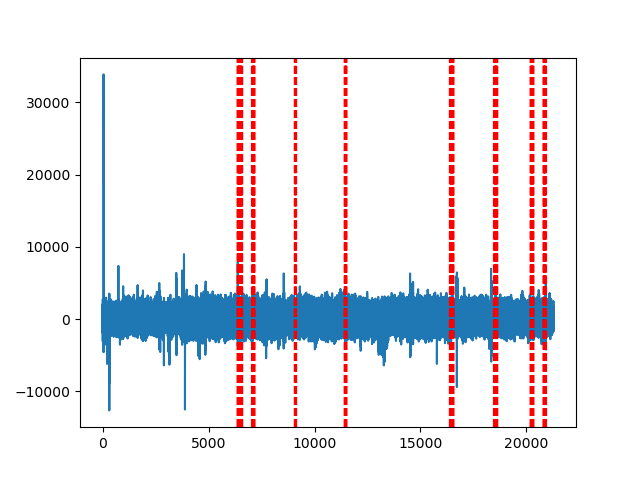

Text(0.5, 1.0, 'Mâle 20 kHz son fort')

In [10]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, Cursor
from scipy import fftpack
import pandas as pd
import mmap
from pathlib import Path

%matplotlib widget

# mmap activated to not store everything in memory

"""def other_mmap(filename, shape, dtype, chunks):
    with open(filename, "rb") as fh:
        # `mmap` duplicates the file descriptor
        # `0` means map the full file
        mm = mmap.mmap(fh.fileno(), 0, access=mmap.ACCESS_READ)

    # coerce to NumPy array of expected type and shape
    a = np.asarray(mm).view(dtype).reshape(shape)

    # Don't call `asarray`
    # name=False to avoid hashing
    a_d = da.from_array(a, chunks=chunks, asarray=False, name=False)
    return a_d"""

folder_base = Path('C:/Users/AudreyHay/Desktop/openephys/2024-02-29_09-45-35/Record Node 103/experiment1/recording1/continuous/Acquisition_Board-100.Rhythm Data')
#folder_base = Path('/mnt/data/ahay/')
filename = folder_base / f'RawDataChannelExtractedDS2.npy'
All = np.load(filename, mmap_mode= 'r')

All = All.T #?
EMG = All[:,22] #Femelle: 58 - 32 = 26 // 0 based : 26-1 = 25 /// Mâle: 0 based uniquement (écrire 22)
HIP = All[:,30]
# Filter parameter :
f_lowcut = 200.
f_hicut = 400.
N = 4
fs = 1000
nyq = 0.5 * fs
Wn = [f_lowcut/nyq,f_hicut/nyq]  # Nyquist frequency fraction


# Filter creation :
b, a = signal.butter(N, Wn, 'band')
filt_EMG = signal.filtfilt(b, a, EMG)

# Plot
times = np.arange(0, EMG.size/fs, 1./fs)
timesmin = np.arange(0, EMG.size/fs/60, 1./fs/60)

# Parameter and computation of CWT
w = 4.
freq = np.linspace(200, 400, 50)
widths = w*fs / (2*freq*np.pi)
EMGcwt = signal.cwt(EMG, signal.morlet2, widths, w=w)

# Charger les timestamps des stimulations
ttl = np.load("C:/Users/AudreyHay/Desktop/openephys/2024-02-29_09-45-35/Record Node 103/experiment1/recording1/events/Acquisition_Board-100.Rhythm Data/TTL/timestamps.npy")
#ttl2 = np.load("C:/Users/AudreyHay/Desktop/openephys/2024-02-20_14-31-33/Record Node 103/experiment1/recording1/events/Acquisition_Board-100.Rhythm Data/TTL/timestamps.npy")
# print(ttl)
ttl = ttl#/60
start = 00000
end = 100000000

tt = times[start:end]

fig, ax = plt.subplots()
#ax.plot(timesmin[:22000*fs], filt_EMG[:22000*fs])
ax.plot(tt, HIP)

# Ajouter des traits verticaux pour chaque timestamp de stimulation
for timestamp in ttl:
    ax.axvline(x=timestamp, color='r', linestyle='--')
    pass

#for timestamp in ttl2 (pour enregistrement fragmenté):
#     ax.axvline(x=timestamp, color='r', linestyle='--')
#     pass

plt.show()
titre = "Mâle 20 kHz son fort" # changer le titre ici
plt.title(titre)